In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\aksha\Downloads\3d22402c-5def-4055-9b59-77484428a6c4-Cement-Consumption-.xlsx',index_col='Month',parse_dates=True)
data.head()

,Period,Cement Consumption
Month,,
2001-04-01,1,333224
2001-05-01,2,399256
2001-06-01,3,626754
2001-07-01,4,366388
2001-08-01,5,361452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2001-04-01 to 2010-11-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Period              116 non-null    int64
 1   Cement Consumption  116 non-null    int64
dtypes: int64(2)
memory usage: 2.7 KB


In [4]:
## Remove Period column
data = data.pop('Cement Consumption')

In [5]:
data = pd.DataFrame(data)

In [6]:
data.head()

,Cement Consumption
Month,
2001-04-01,333224
2001-05-01,399256
2001-06-01,626754
2001-07-01,366388
2001-08-01,361452


In [7]:
data.shape

(116, 1)

<AxesSubplot:xlabel='Month'>

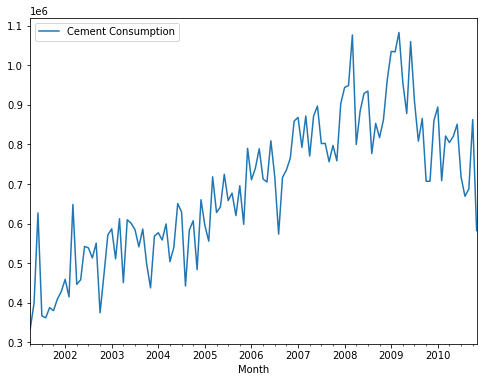

In [8]:
data.plot(figsize=(8,6))

In [9]:
len(data)-12

104

In [10]:
train = data.iloc[:104]
test = data.iloc[104:]

In [11]:
len(train)

104

In [12]:
len(test)

12

In [13]:
#Normalization of data
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [16]:
test_scaled

array([[0.88970031],
       [1.        ],
       [0.40434906],
       [0.76532899],
       [0.71250843],
       [0.76288301],
       [0.860892  ],
       [0.43399189],
       [0.27804334],
       [0.33713394],
       [0.89784721],
       [0.        ]])

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
#We will take 12 values to predict the time series data
n_input = 12
generator = TimeseriesGenerator(train_scaled,train_scaled,length = n_input,batch_size=1)

In [19]:
train_scaled[:12]

array([[0.        ],
       [0.08803023],
       [0.39131803],
       [0.04421242],
       [0.03763201],
       [0.07207648],
       [0.06186326],
       [0.1007071 ],
       [0.12606218],
       [0.16722437],
       [0.10848067],
       [0.41991132]])

In [20]:
generator[1]

(array([[[0.08803023],
         [0.39131803],
         [0.04421242],
         [0.03763201],
         [0.07207648],
         [0.06186326],
         [0.1007071 ],
         [0.12606218],
         [0.16722437],
         [0.10848067],
         [0.41991132],
         [0.15038541]]]),
 array([[0.16596588]]))

In [21]:
len(generator)

92

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
# Initializing the RNN

## Defining the model
rnn = Sequential()

# Adding input and hidden layers

rnn.add(LSTM(units=100,activation='relu',input_shape=(n_input,1)))

# Output Layers

rnn.add(Dense(units=1))

# Compiling the model

rnn.compile(optimizer='adam',loss='mse')

# Fitting the model

rnn.fit(generator,epochs=50)

Epoch 1/50
92/92 [==============================] - 2s 3ms/step - loss: 0.0675
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 5/50
92/92 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 6/50
92/92 [==============================] - 0s 4ms/step - loss: 0.0149
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 8/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 9/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 10/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 11/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 12/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 13/50
92/92 [==============================

In [24]:
test_scaled

array([[0.88970031],
       [1.        ],
       [0.40434906],
       [0.76532899],
       [0.71250843],
       [0.76288301],
       [0.860892  ],
       [0.43399189],
       [0.27804334],
       [0.33713394],
       [0.89784721],
       [0.        ]])

In [25]:
train_scaled[-12:]

array([[0.84221163],
       [0.93607437],
       [0.93468923],
       [1.        ],
       [0.83031865],
       [0.72689593],
       [0.96917902],
       [0.76699027],
       [0.63329049],
       [0.70980368],
       [0.49818426],
       [0.49828024]])

In [26]:
predict_train = train_scaled[-12:]

In [27]:
predict_train = predict_train.reshape(1,n_input,1)

In [28]:
predict_train.shape

(1, 12, 1)

In [29]:
rnn.predict(predict_train)

array([[0.7384889]], dtype=float32)

In [30]:
test_scaled[0]

array([0.88970031])